# Hw2 Experimentation: Language Models

**Author**:Sam Showalter

**Date**:2021-04-13

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

## Module and Package Imports

In [2]:
from lm import *
from data import *
from generator import Sampler
from experiments import *

## Hyperparameter tuning experiments

In [86]:
# For bigram
ks = [1,0.5,0.1,0.05,0.01,0.005,0.001, 0.0005, 0.0001,0.00005,0.00001]
r = addk_ablation(2,ks)

brown  read. train: 39802 dev: 8437 test: 8533
reuters  read. train: 38183 dev: 8083 test: 8199
gutenberg  read. train: 68767 dev: 14667 test: 14861
Unigram: brown
Unigram: reuters
Unigram: gutenberg


100%|██████████| 11/11 [01:04<00:00,  5.87s/it]


In [104]:
# For trigram
ks = [1,0.5,0.1,0.05,0.01,0.005,0.001, 0.0005, 0.0001,0.00005,0.00001]
r = addk_ablation(3,ks)

brown  read. train: 39802 dev: 8437 test: 8533
reuters  read. train: 38183 dev: 8083 test: 8199
gutenberg  read. train: 68767 dev: 14667 test: 14861
Unigram: brown
Unigram: reuters
Unigram: gutenberg


100%|██████████| 11/11 [01:22<00:00,  7.46s/it]


In [20]:
#Backoff ablation with no add-k
ns = [2,3,4,5,6,7]
r = backoff_ablation(ns,None, r)

brown  read. train: 39802 dev: 8437 test: 8533
reuters  read. train: 38183 dev: 8083 test: 8199


  0%|          | 0/6 [00:00<?, ?it/s]

gutenberg  read. train: 68767 dev: 14667 test: 14861
brown


  0%|          | 0/6 [00:00<?, ?it/s]

reuters


  0%|          | 0/6 [00:00<?, ?it/s]

gutenberg


100%|██████████| 6/6 [01:43<00:00, 17.30s/it]


In [112]:
# r
addk

{'brown': {1: {'perplexity': {'train': 1513.8018008490042,
    'dev': 1737.5445705338257,
    'test': 1758.248804766443}},
  3: {1: {'perplexity': {'train': 13701.171612112452,
     'dev': 14530.408751889301,
     'test': 14494.359026219534}},
   0.5: {'perplexity': {'train': 8919.829215707545,
     'dev': 12933.916034245001,
     'test': 12915.380354715597}},
   0.1: {'perplexity': {'train': 2523.9572574244653,
     'dev': 9753.576268195582,
     'test': 9772.637471939996}},
   0.05: {'perplexity': {'train': 1386.5125724444226,
     'dev': 8686.079973549282,
     'test': 8717.683838136792}},
   0.01: {'perplexity': {'train': 342.5639334289817,
     'dev': 6907.170620953843,
     'test': 6959.856505392535}},
   0.005: {'perplexity': {'train': 191.2106026633755,
     'dev': 6422.97070131712,
     'test': 6482.644699704734}},
   0.001: {'perplexity': {'train': 54.34309445679581,
     'dev': 5947.397683907655,
     'test': 6023.168575513985}},
   0.0005: {'perplexity': {'train': 33.531347

## Plots of Hyperparameter tuning

### Add-k bigram

In [88]:
addk = None
with open("data/results/addk_ablation_bigram.pkl", "rb") as file:
    addk = pkl.load(file)

In [90]:
dnames = ['brown','reuters','gutenberg']

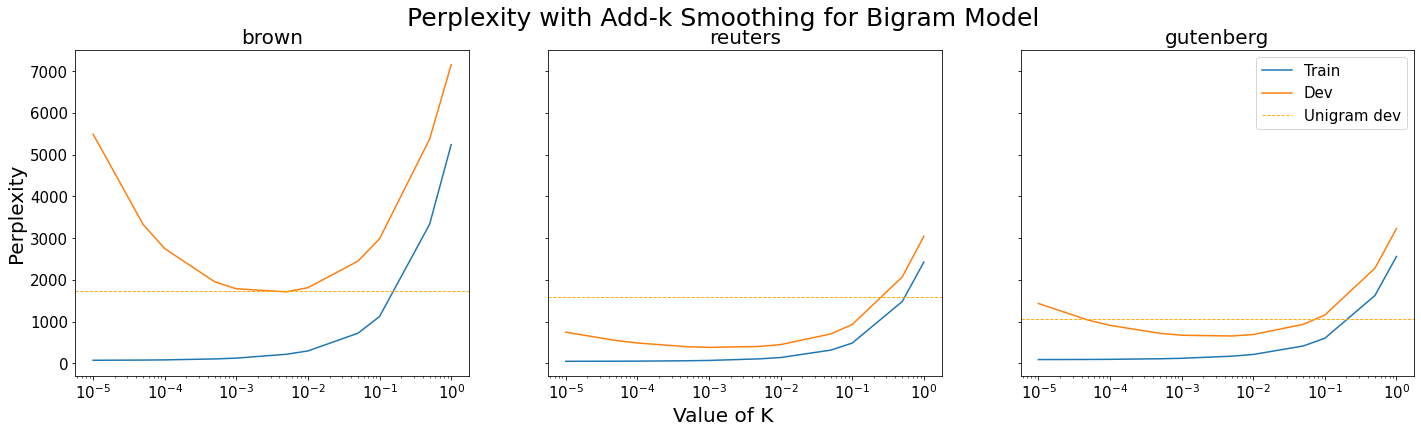

In [102]:
fig,ax = plt.subplots(1,3, figsize = (24,6),sharex = True, sharey = True)

for i,d in enumerate(dnames):
    dev_perp = [addk[d][2][i]['perplexity']['dev'] for i in ks]
    train_perp = [addk[d][2][i]['perplexity']['train'] for i in ks]
    unigram_train = addk[d][1]['perplexity']['train']
    unigram_dev = addk[d][1]['perplexity']['dev']
    if i == 0:
        ax[i].set_ylabel("Perplexity", fontsize = 20)
    ax[i].semilogx(ks, train_perp, label = "Train")
    ax[i].semilogx(ks, dev_perp, label = "Dev")
#     ax[i].axhline(unigram_train, label = "Unigram train",linestyle = 'dashed',linewidth = 0.9
#             , c = 'blue')
    ax[i].axhline(unigram_dev, label = "Unigram dev",linestyle = 'dashed',linewidth = 0.9
            , c = 'orange')
    ax[i].set_title(d, fontsize = 20)
plt.tick_params(axis = 'both',labelsize = 15)

plt.suptitle("Perplexity with Add-k Smoothing for Bigram Model",fontsize = 25)
fig.supxlabel("Value of K",fontsize = 20)
plt.legend(fontsize = 15)

### Add-k Trigram

In [105]:
addk = None
with open("data/results/addk_ablation_trigram.pkl", "rb") as file:
    addk = pkl.load(file)

In [106]:
dnames = ['brown','reuters','gutenberg']

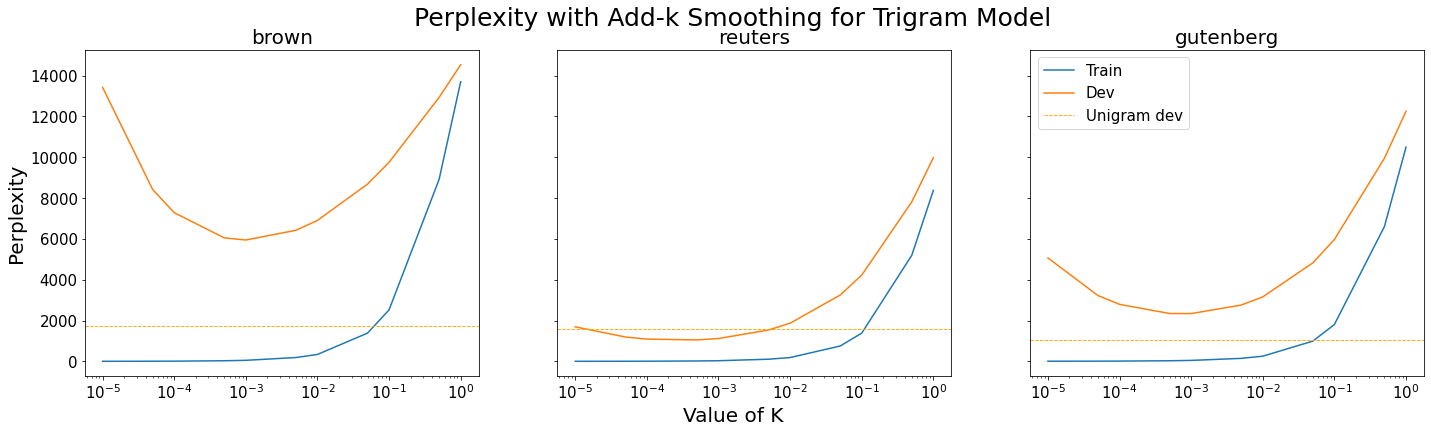

In [107]:
fig,ax = plt.subplots(1,3, figsize = (24,6),sharex = True, sharey = True)

for i,d in enumerate(dnames):
    dev_perp = [addk[d][3][i]['perplexity']['dev'] for i in ks]
    train_perp = [addk[d][3][i]['perplexity']['train'] for i in ks]
    unigram_train = addk[d][1]['perplexity']['train']
    unigram_dev = addk[d][1]['perplexity']['dev']
    if i == 0:
        ax[i].set_ylabel("Perplexity", fontsize = 20)
    ax[i].semilogx(ks, train_perp, label = "Train")
    ax[i].semilogx(ks, dev_perp, label = "Dev")
#     ax[i].axhline(unigram_train, label = "Unigram train",linestyle = 'dashed',linewidth = 0.9
#             , c = 'blue')
    ax[i].axhline(unigram_dev, label = "Unigram dev",linestyle = 'dashed',linewidth = 0.9
            , c = 'orange')
    ax[i].set_title(d, fontsize = 20)
plt.tick_params(axis = 'both',labelsize = 15)

plt.suptitle("Perplexity with Add-k Smoothing for Trigram Model",fontsize = 25)
fig.supxlabel("Value of K",fontsize = 20)
plt.legend(fontsize = 15)

### Backoff Plots

In [95]:
r = None
with open("data/results/backoff_ablation.pkl", "rb") as file:
    r = pkl.load(file)

In [96]:
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

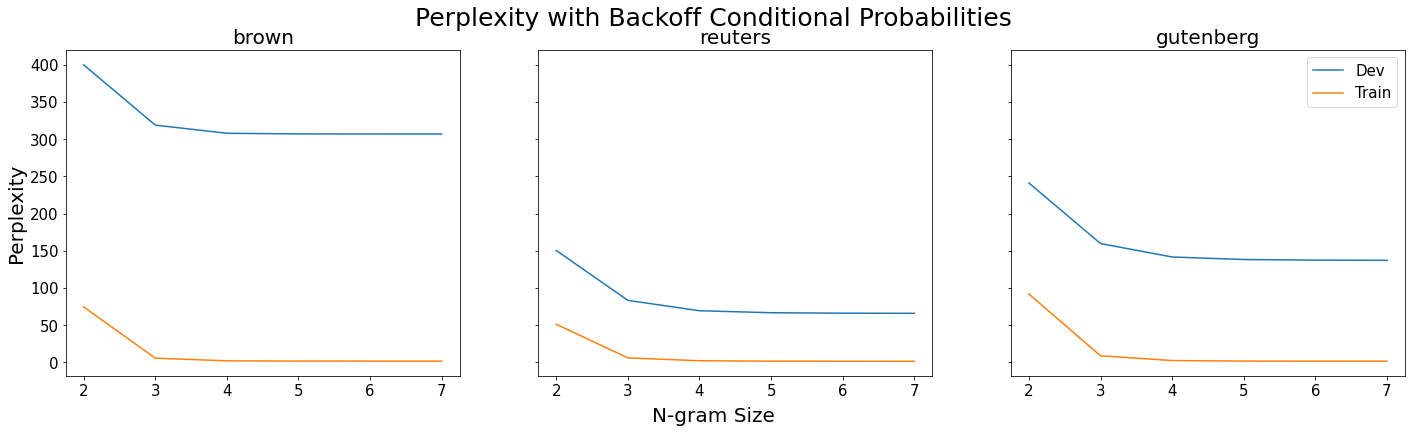

In [101]:
add_k_best_perf = [1715.467, 384.85, 657.5382256991614]
fig,ax = plt.subplots(1,3, figsize = (24,6),sharex = True, sharey = True)

for i,d in enumerate(dnames):
    backoff_dev_perp = [r[d][i]['backoff']['perplexity']['dev'] for i in ns]
    backoff_train_perp = [r[d][i]['backoff']['perplexity']['train'] for i in ns]
    if i == 0:
        ax[i].set_ylabel("Perplexity", fontsize = 20)
    ax[i].plot(ns, backoff_dev_perp, label = "Dev")
    ax[i].plot(ns, backoff_train_perp, label = "Train")
#     ax[i].axhline(add_k_best_perf[i], label = "Best add-k",linestyle = 'dashed',linewidth = 0.9
#             , c = 'blue')
    ax[i].set_title(d, fontsize = 20)
plt.tick_params(axis = 'both',labelsize = 15)

plt.suptitle("Perplexity with Backoff Conditional Probabilities",fontsize = 25)
fig.supxlabel("N-gram Size",fontsize = 20)
plt.legend(fontsize = 15)
 
    

## Analysis on Out-Of-Domain Text: Empirical

In [110]:
!streamlit run demo.py


  You can now view your Streamlit app in your browser.

  Network URL: http://128.195.10.228:8501
  External URL: http://128.195.10.228:8501

^C
  Stopping...


## Analysis on Out-of-Domain Text: Qualitative